In [37]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [38]:
# creating url for parsing
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [39]:
# declare latitude and longitude variables to hold arrays and create random lat and long combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add latitudes and longitudes to a list
coordintates = list(lat_lngs)

In [41]:
# running citipy on our zipped lat_lngs
# create list to hold city names returned
cities = []

# Identify nearest city to lat and long combination from our numpy array
for coordintate in coordintates:
    city = citipy.nearest_city(coordintate[0], coordintate[1]).city_name

    # check to see if the city name is unique, if it is then add it to our list
    if city not in cities:
        cities.append(city)
# print the length of our city list
len(cities)

606

In [45]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# enumerate through list to get city index and name 
for i, city in enumerate(cities):

    # Group the cities in sets of 50 for logging and debugging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # create endpoint url for each city
    # city_url = f"{url}&q={city.replace(" ","+")}"
    city_url = url + "&q=" + city.replace(" ", "+")

    # log the URL, record, and set numbers of each city
    print(f"Processing {record_count} of Set {set_count} | {city}")
    # add 1 to our record counter
    record_count += 1

    # run API call - except if we don't get anything back
    try:
        # parse JSON data from API call
        city_weather = requests.get(city_url).json()
        # parse city data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If we get an error skip that city
    except:
        print("City not found. Skipping...")
        pass
# print to show that data has loaded 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

6 of Set 2 | saint anthony
Processing 17 of Set 2 | lorengau
Processing 18 of Set 2 | ponta do sol
Processing 19 of Set 2 | carbonia
Processing 20 of Set 2 | grindavik
Processing 21 of Set 2 | amapa
Processing 22 of Set 2 | burnie
Processing 23 of Set 2 | nanortalik
Processing 24 of Set 2 | avarua
Processing 25 of Set 2 | darnah
Processing 26 of Set 2 | hermanus
Processing 27 of Set 2 | puerto del rosario
Processing 28 of Set 2 | kuche
City not found. Skipping...
Processing 29 of Set 2 | qaanaaq
Processing 30 of Set 2 | saleaula
City not found. Skipping...
Processing 31 of Set 2 | beringovskiy
Processing 32 of Set 2 | bethel
Processing 33 of Set 2 | santa marta
Processing 34 of Set 2 | saskylakh
Processing 35 of Set 2 | lebork
Processing 36 of Set 2 | tuatapere
Processing 37 of Set 2 | constantine
Processing 38 of Set 2 | tuktoyaktuk
Processing 39 of Set 2 | panorama
Processing 40 of Set 2 | korla
Processing 41 of Set 2 | bredasdorp
Processing 42 of Set 2 | havre-saint-pierre
Processin

In [79]:
# convert data from API pull into Pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,55.99,79,99,1.99,AU,2021-04-17 15:15:22
1,Victoria,22.2855,114.1577,75.00,81,96,15.79,HK,2021-04-17 15:13:53
2,Constitucion,-35.3333,-72.4167,61.36,76,100,6.31,CL,2021-04-17 15:15:22
3,Souillac,-20.5167,57.5167,80.60,83,75,1.14,MU,2021-04-17 15:15:22
4,Port-Gentil,-0.7193,8.7815,89.60,70,20,13.80,GA,2021-04-17 15:15:23
5,Kodiak,57.7900,-152.4072,39.20,87,90,5.82,US,2021-04-17 15:15:23
6,La Ronge,55.1001,-105.2842,46.40,45,100,9.22,CA,2021-04-17 15:15:23
7,Jamestown,42.0970,-79.2353,42.01,87,90,8.05,US,2021-04-17 15:11:19
8,Severodvinsk,64.5635,39.8302,44.60,57,0,8.95,RU,2021-04-17 15:15:24
9,San Patricio,28.0170,-97.5169,60.80,82,90,25.32,US,2021-04-17 15:15:24


In [81]:
# reset the column order for easier understanding
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-04-17 15:15:22,-42.7826,147.0587,55.99,79,99,1.99
1,Victoria,HK,2021-04-17 15:13:53,22.2855,114.1577,75.00,81,96,15.79
2,Constitucion,CL,2021-04-17 15:15:22,-35.3333,-72.4167,61.36,76,100,6.31
3,Souillac,MU,2021-04-17 15:15:22,-20.5167,57.5167,80.60,83,75,1.14
4,Port-Gentil,GA,2021-04-17 15:15:23,-0.7193,8.7815,89.60,70,20,13.80
5,Kodiak,US,2021-04-17 15:15:23,57.7900,-152.4072,39.20,87,90,5.82
6,La Ronge,CA,2021-04-17 15:15:23,55.1001,-105.2842,46.40,45,100,9.22
7,Jamestown,US,2021-04-17 15:11:19,42.0970,-79.2353,42.01,87,90,8.05
8,Severodvinsk,RU,2021-04-17 15:15:24,64.5635,39.8302,44.60,57,0,8.95
9,San Patricio,US,2021-04-17 15:15:24,28.0170,-97.5169,60.80,82,90,25.32


In [82]:
# create output file in .csv format
output_data_file = "weather_data/cities.csv"
# export output file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [84]:
# extraact data from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [85]:
# import time module - will use for graph titles - why do we need to use this instead of datetime?
import time

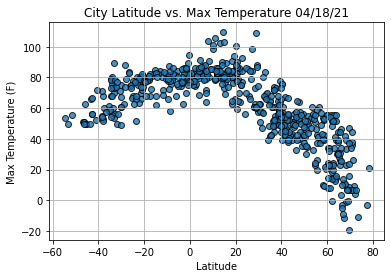

In [87]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# format the graph
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save our graph
plt.savefig("weather_data/Fig1.png")

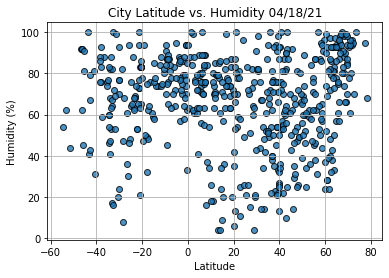

In [88]:
# plot latitude vs. humidity
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# format the graph
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save our graph
plt.savefig("weather_data/Fig2.png")

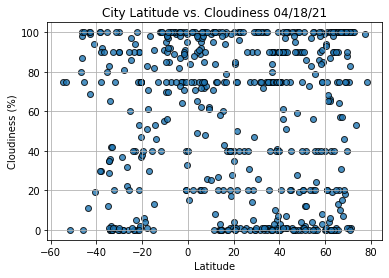

In [89]:
# plot latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# format the graph
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save our graph
plt.savefig("weather_data/Fig3.png")

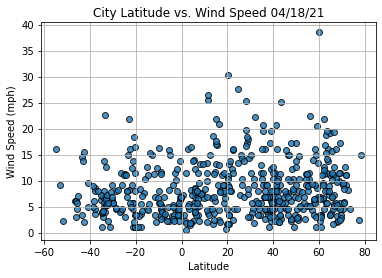

In [90]:
# scatter chart latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [122]:
# import linregress to use in function
from scipy.stats import linregress

# Create linear regression function
# plot regression line and the equation with the data
def plot_linear_regrssion(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [100]:
# Create data frames for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [103]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Victoria,HK,2021-04-17 15:13:53,22.2855,114.1577,75.00,81,96,15.79
5,Kodiak,US,2021-04-17 15:15:23,57.7900,-152.4072,39.20,87,90,5.82
6,La Ronge,CA,2021-04-17 15:15:23,55.1001,-105.2842,46.40,45,100,9.22
7,Jamestown,US,2021-04-17 15:11:19,42.0970,-79.2353,42.01,87,90,8.05
8,Severodvinsk,RU,2021-04-17 15:15:24,64.5635,39.8302,44.60,57,0,8.95


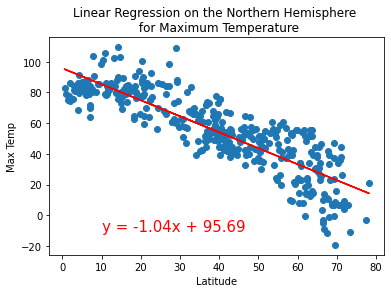

In [131]:
# Linear regression variables for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,-10))

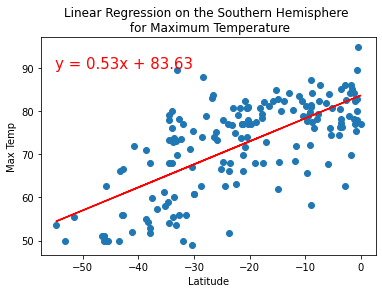

In [132]:
# Linear regression variables for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-55, 90))

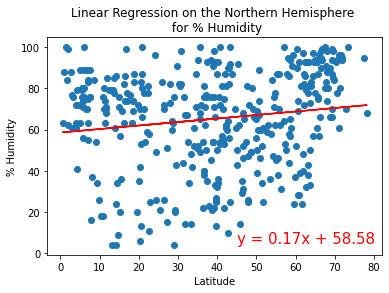

In [133]:
# Linear regression variables for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (45,5))

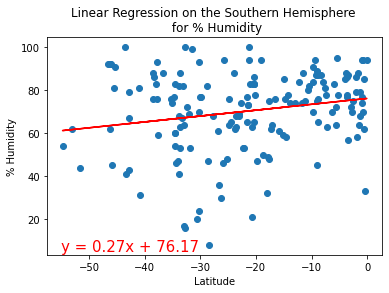

In [134]:
# Linear regression variables for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-55,5))

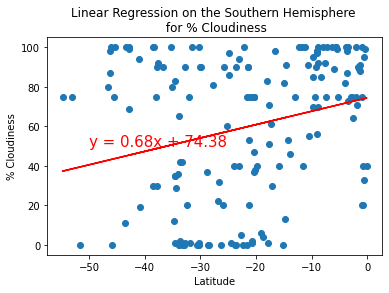

In [140]:
# Linear regression variables for Southern Hemisphere % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-50,50))

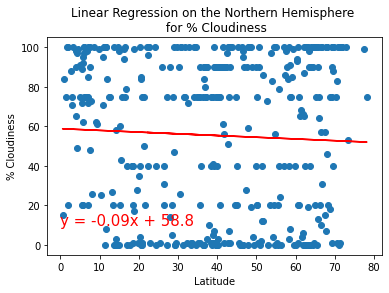

In [143]:
# Linear regression variables for Northern Hemisphere % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (0,10))

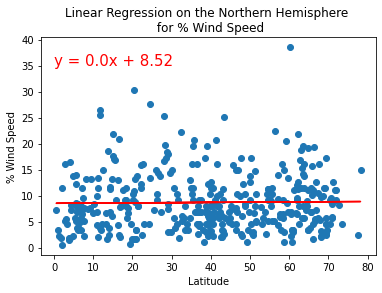

In [147]:
# Linear regression variables for Northern Hemisphere % Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Wind Speed", "% Wind Speed", (0,35))

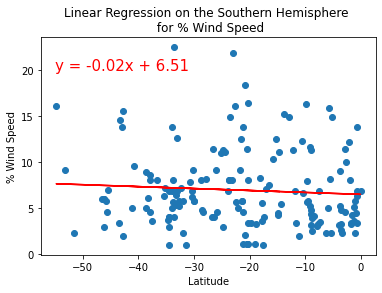

In [146]:
# Linear regression variables for Southern Hemisphere % Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# call linear regression function with these values
plot_linear_regrssion(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Wind Speed", "% Wind Speed", (-55,20))